多元線性回歸
* 資料來源參考:

載入需要的套件

In [1]:
# 資料處理套件
import pandas as pd
import numpy as np
# 構圖套件
import matplotlib.pyplot as plt
import matplotlib as mpl
# 安裝、下載並導入中文字型
!pip install wget
import wget
wget.download('https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf')
from matplotlib.font_manager import fontManager
fontManager.addfont("ChineseFont.ttf")
# 分析套件
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
import scipy.stats as stats

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=e3346ba35b650c33000ac899ae69132413b2cbe40a07eb0566ce153445e25ee4
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


介紹與建構加州房價資料集
* 變數介紹
1. MedInc : 該地區的收入中位數
2. HouseAge : 該地區的房屋年齡中位數
3. AveRooms : 該地區的平均房間數
4. AveBedrms : 該地區的平均臥室數
5. Population : 該地區的人口數
6. AveOccup : 平均佔用率,指房屋被佔用的平均比例
7. Latitude : 該地區的緯度
8. Longitude : 該地區的經度
* 預測目標 : 地區房屋的中位價格(單位 : 千美元)

In [ ]:
FCH = fetch_california_housing()
x = pd.DataFrame(FCH.data, columns=FCH.feature_names)
y = pd.DataFrame(FCH.target, columns=['target'])
print(x.shape, y.shape)

In [14]:
# 若無法載入sklearn提供之資料，請執行以下
# 資料備份載點
# https://drive.google.com/file/d/1oLPhk3ZAV1rjvksjhyIvv-d0L1OmXet-/view?usp=sharing
# https://drive.google.com/file/d/1HmpGdKDqNoGDS6KSf5hzu-ichd_Ta4bb/view?usp=sharing
# x = pd.read_csv("/content/m_linear_x.csv")
# y = pd.read_csv("/content/m_linear_y.csv")

資料切割與建模

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)
reg = LR()
reg.fit(xtrain, ytrain)
train_rsquare = reg.score(xtrain, ytrain)  # 0.608
test_rsquare = reg.score(xtest, ytest)  # 0.596
print(train_rsquare, test_rsquare)
# 無論是訓練或測試集，R-square大於0.5，表示自變數與應變數間存在一定線性關係

0.6083741964648377 0.5965968374812352


驗證線性關係(皮爾森線性相關係數)

In [21]:
all_train_data = pd.concat([xtrain, ytrain], axis=1)
var = [i for i in x.columns.tolist()]
# 計算特徵和目標之間的相關係數
for i in var:
  correlation_coefficient, p_value = stats.pearsonr(all_train_data[i], all_train_data['target'])
  print(f"{i}的相關係數是: {correlation_coefficient:.2f}")
  print(f"{i}的p-value:, {p_value:.4f}")
# 發現各變數與應變數間都有顯著相關，且MedInc的相關性最強，相關係數為0.688

MedInc的相關係數是: 0.69
MedInc的p-value:, 0.0000
HouseAge的相關係數是: 0.11
HouseAge的p-value:, 0.0000
AveRooms的相關係數是: 0.15
AveRooms的p-value:, 0.0000
AveBedrms的相關係數是: -0.04
AveBedrms的p-value:, 0.0000
Population的相關係數是: -0.02
Population的p-value:, 0.0021
AveOccup的相關係數是: -0.02
AveOccup的p-value:, 0.0047
Latitude的相關係數是: -0.14
Latitude的p-value:, 0.0000
Longitude的相關係數是: -0.05
Longitude的p-value:, 0.0000


看看兩組間的R-square與MSE差距大不大

In [22]:
print(reg.score(xtrain, ytrain))
print(reg.score(xtest, ytest))
# 分數差距不大，沒有overfitting的問題

0.6083741964648377
0.5965968374812352


In [23]:
y_pred_train = reg.predict(xtrain)
y_pred_test = reg.predict(xtest)
# 計算訓練集和測試集上的均方誤差（MSE）
mse_train = mean_squared_error(ytrain, y_pred_train)
mse_test = mean_squared_error(ytest, y_pred_test)
print("訓練集的MSE:", mse_train)
print("測試集的MSE:", mse_test)
# 誤差並沒有太大的差異

訓練集的MSE: 0.5232624469073835
測試集的MSE: 0.529140234539731


#繪圖
相關係數最大的是MedInc，來看看這個變數的圖

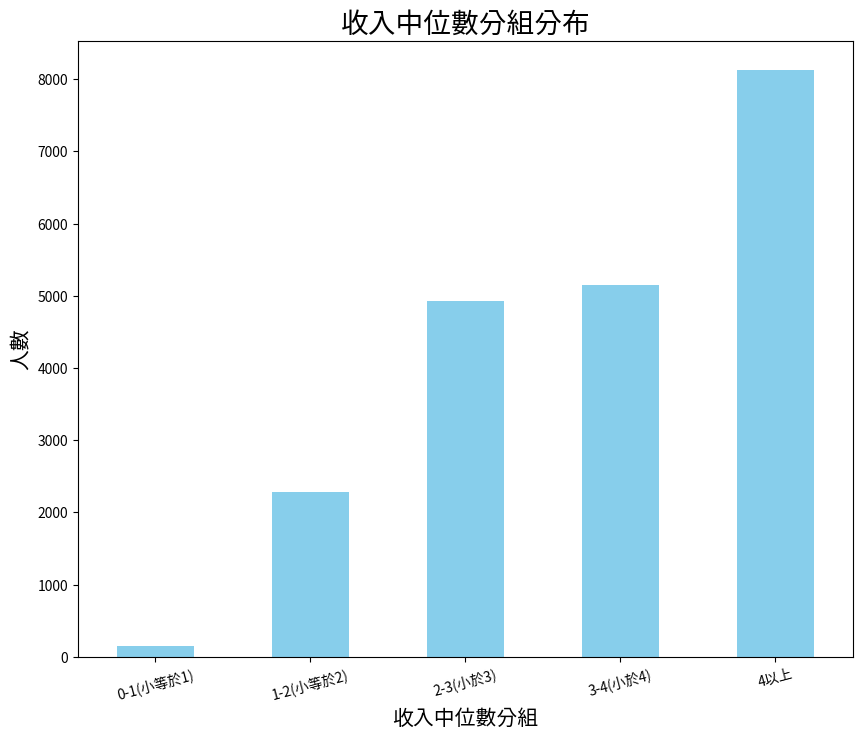

In [25]:
# 合併資料並分組
all_data = pd.concat([x, y], axis=1)
MedInc_gp = []
for i in all_data["MedInc"]:
  if i < 1:
    MedInc_gp.append(0)
  elif i < 2:
    MedInc_gp.append(1)
  elif i < 3:
    MedInc_gp.append(2)
  elif i < 4:
    MedInc_gp.append(3)
  else:
    MedInc_gp.append(4)
all_data["MedInc_gp"] = MedInc_gp

# 設定中文標籤
fontManager.addfont('ChineseFont.ttf')
mpl.rc('font',family='ChineseFont')
labels = ['0-1(小等於1)', '1-2(小等於2)', '2-3(小於3)', '3-4(小於4)', '4以上']
# 長條圖
plt.figure(figsize=(10, 8))
all_data["MedInc_gp"].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('收入中位數分組分布', size=20)
plt.xlabel('收入中位數分組', size=15)
plt.ylabel('人數', size=15)
plt.xticks(ticks=range(5), labels=labels, rotation=15)
plt.show()

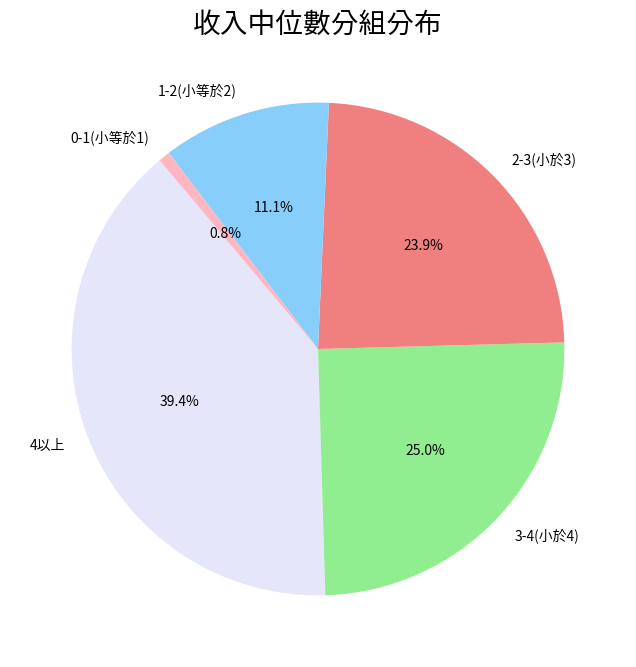

In [26]:
# 繪製圓餅圖
plt.figure(figsize=(8, 8))
labels = ['4以上', '3-4(小於4)', '2-3(小於3)', '1-2(小等於2)', '0-1(小等於1)']
all_data["MedInc_gp"].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=130, colors=['lavender', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'], labels=labels)
plt.title('收入中位數分組分布', size=20)
plt.ylabel('')
plt.show()